## A Visual History of Nobel Prize Winners!
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>
The Nobel Prize stands as one of the globe's most renowned scientific accolades. Beyond the honor, respect, and substantial financial reward it bestows upon its recipients, a distinctive gold medal featuring the likeness of Alfred Nobel (1833 - 1896), the visionary behind the prize, is also granted. Each year, this esteemed prize is bestowed upon scientists and scholars in categories spanning chemistry, literature, physics, physiology or medicine, economics, and peace. The inaugural Nobel Prize was distributed in 1901, a time when the prize leaned significantly towards a Eurocentric and male-centric bias. However, contemporary iterations of the prize strive to eliminate biases, aiming for impartiality in all respects.

The authors of the course Zero to pandas earned my respect and admiration. The way course is complied and the way it is delivered is fantastic. 

## Downloading the Dataset

The dataset i will be using in this project is downloaded from kaggle.

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/thedevastator/a-complete-history-of-nobel-prize-winners/code' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./a-complete-history-of-nobel-prize-winners" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './a-complete-history-of-nobel-prize-winners'

In [5]:
import os
os.listdir(data_dir)

['nobelTriples.csv', 'nobel_prize_by_winner.csv', 'nobel_prizes_by_date.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "a-visual-history-of-nobel-prize-winners"

## Installing the packages

Installing the required packages and libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the dataset
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [11]:
nobel = pd.read_csv(data_dir + "/nobel_prize_by_winner.csv", index_col=0)

In [12]:
# Viewing first 3 rows of dataset
nobel.sample(3)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
index,,,,,,,,,,,,,,,,,,,,
159,732,James J.,Heckman,4/19/1944,0000-00-00,USA,US,"Chicago, IL",NaN,NaN,NaN,male,2000.0,economics,NaN,2.0,"""for his development of theory and methods for...",University of Chicago,"Chicago, IL",USA
799,563,Jos_,Ramos-Horta,12/26/1949,0000-00-00,East Timor,TL,Dili,NaN,NaN,NaN,male,1996.0,peace,NaN,2.0,"""for their work towards a just and peaceful so...",NaN,NaN,NaN
768,706,William F.,Sharpe,6/16/1934,0000-00-00,USA,US,"Boston, MA",NaN,NaN,NaN,male,1990.0,economics,NaN,3.0,"""for their pioneering work in the theory of fi...",Stanford University,"Stanford, CA",USA


After a quick glimpse at the dataset we see that there are a lot of columns which are not relevant to our analysis, so i will drop them later.

## Data Preparation and Cleaning
- Handling unnecessary columns
- Missing values
- Duplicate values

In [13]:
nobel.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

After a quick glimpse at the dataset we see that there are a lot of columns which are not relevant to our analysis, so we will drop them.

In [14]:
#Can see columnns that are not necessary for our analysis so drope them
nobel = nobel.drop(columns= ['id', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'overallMotivation', 'share', 'name', 'city', 'country'])

In [15]:
nobel.sample(3)

,firstname,surname,born,died,bornCountry,bornCountryCode,gender,year,category,motivation
index,,,,,,,,,,
290,Richard Martin,Willst_tter,08/13/1872,8/3/1942,Germany,DE,male,1915.0,chemistry,"""for his researches on plant pigments, especia..."
330,Sir Chandrasekhara Venkata,Raman,11/07/1888,11/21/1970,India,IN,male,1930.0,physics,"""for his work on the scattering of light and f..."
874,Gônter,Grass,10/16/1927,4/13/2015,Free City of Danzig (now Poland),PL,male,1999.0,literature,"""whose frolicsome black fables portray the for..."


As we can see Columns are not that much descriptive, we will convert them into more descriptive form.

In [16]:
nobel.rename(columns = {"born": "date_of_birth", 
                     "died": "date_of_death",
                     "bornCountry": "Country_of_birth", 
                     "bornCountryCode": "Country_code_of_birth"}, inplace = True)

In [17]:
nobel.shape

(972, 10)

In [18]:
# Check for any duplicate entries.

nobel.duplicated().sum()

63

Our dataset contains some duplicate entries, this could leads to wrong analysis. Lets get rid of those.

In [19]:
# # drop duplicates
# nobel = nobel.loc[~nobel.duplicated(subset =['firstname', "surname", "category", 'date_of_birth'])].reset_index(drop = True).copy()
# nobel.duplicated().sum()

nobel = nobel[~nobel.duplicated(subset=['firstname', 'surname', 'date_of_birth', 'category'])].reset_index(drop = True).copy()

In [20]:
nobel.duplicated().sum()

0

In [23]:
# Check for missing values and treat them accordingly

total_NaN_in_df = nobel.isna().sum().sum()
total_NaN_in_columns = nobel.isna().sum()
print("Total sum of NaN values in entire dataframe is: ", total_NaN_in_df)
print("_"*50)
print("Total sum of NaN values in individual columns: \n")
total_NaN_in_columns

Total sum of NaN values in entire dataframe is:  211
__________________________________________________
Total sum of NaN values in individual columns: 



firstname                 1
surname                  28
date_of_birth            23
date_of_death            23
Country_of_birth         24
Country_code_of_birth    24
gender                    0
year                      1
category                  1
motivation               86
dtype: int64

Lets Plot heatmap for missing values to see the distribution of missingvalues in dataset.

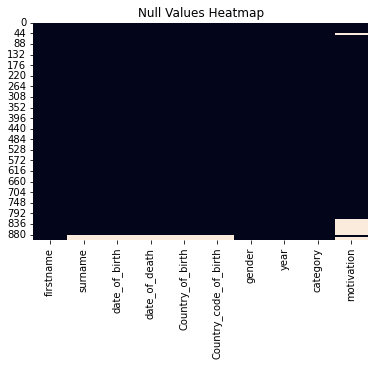

In [24]:
sns.heatmap(nobel.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

Its clearly evident from graph missing values are not randomly distributed in dataset but are in some particular range i.e at the tail of dataset, following columns contains most of missing values:
- date_of_birth
- date_of_death
- Country_of_birth
- Country_code_of_birth
- motivation

In [25]:
nobel[nobel['date_of_birth'].isnull()]

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,gender,year,category,motivation
881,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,org,2015.0,peace,"""for its decisive contribution to the building..."
882,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,org,2013.0,peace,"""for its extensive efforts to eliminate chemic..."
883,European Union (EU),NaN,NaN,NaN,NaN,NaN,org,2012.0,peace,"""for over six decades contributed to the advan..."
884,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,org,2007.0,peace,"""for their efforts to build up and disseminate..."
885,Grameen Bank,NaN,NaN,NaN,NaN,NaN,org,2006.0,peace,"""for their efforts to create economic and soci..."
886,Pugwash Conferences on Science and World Affairs,NaN,NaN,NaN,NaN,NaN,org,1995.0,peace,"""for their efforts to diminish the part played..."
887,International Atomic Energy Agency (IAEA),NaN,NaN,NaN,NaN,NaN,org,2005.0,peace,"""for their efforts to prevent nuclear energy f..."
888,United Nations (U.N.),NaN,NaN,NaN,NaN,NaN,org,2001.0,peace,"""for their work for a better organized and mor..."
889,International Campaign to Ban Landmines (ICBL),NaN,NaN,NaN,NaN,NaN,org,1997.0,peace,"""for their work for the banning and clearing o..."
890,M_decins Sans Frontires,NaN,NaN,NaN,NaN,NaN,org,1999.0,peace,"""in recognition of the organization's pioneeri..."


We can clearly see that there is garbage data in particular range i.e. from index [881:903], so we will exclude that range from dataset.

In [26]:
# nobel = nobel[881:903]
nobel = nobel[~nobel.index.isin(range(881, 904))]

In [27]:
nobel.isna().sum()

firstname                 1
surname                   5
date_of_birth             0
date_of_death             0
Country_of_birth          1
Country_code_of_birth     1
gender                    0
year                      1
category                  1
motivation               73
dtype: int64

As can see from above information we have a missing value in 'firstname' column, as it is important column so can't ingnore it
because without first name that particular row is useless. Again We have large null values in 'motivation' column, as it is not important factor we can impute it with empty string.

We will again check for null values in  'firstname' column particularly,as it is important feature for analysis.

In [28]:
nobel[nobel['firstname'].isnull()]

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,gender,year,category,motivation
837,NaN,NaN,0000/00/00,0000-00-00,NaN,NaN,male,NaN,NaN,NaN


The whole row_index[837] contains garbage data so we will drop it.

In [29]:
# nobel = nobel[~nobel.index.isin(837)]
index_to_drop = 837
nobel = nobel.drop(index_to_drop)

In [30]:
nobel.isna().sum()

firstname                 0
surname                   4
date_of_birth             0
date_of_death             0
Country_of_birth          0
Country_code_of_birth     0
gender                    0
year                      0
category                  0
motivation               72
dtype: int64

Fill missing values for column 'surname' and 'motivation' with empty string

In [31]:
nobel['surname'].fillna('', inplace=True)
nobel['motivation'].fillna('', inplace=True)

In [32]:
nobel.isna().sum()

firstname                0
surname                  0
date_of_birth            0
date_of_death            0
Country_of_birth         0
Country_code_of_birth    0
gender                   0
year                     0
category                 0
motivation               0
dtype: int64

Bingo!!!! now our data is tidy and is ready for analysis.

In [33]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 880
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   firstname              880 non-null    object 
 1   surname                880 non-null    object 
 2   date_of_birth          880 non-null    object 
 3   date_of_death          880 non-null    object 
 4   Country_of_birth       880 non-null    object 
 5   Country_code_of_birth  880 non-null    object 
 6   gender                 880 non-null    object 
 7   year                   880 non-null    float64
 8   category               880 non-null    object 
 9   motivation             880 non-null    object 
dtypes: float64(1), object(9)
memory usage: 75.6+ KB


We need 'date_of_birth' and 'date_of_death' in datetime format, so treat the accordingly.

In [34]:
# change format of columns 

nobel['date_of_birth'] = pd.to_datetime(nobel['date_of_birth'], errors= 'coerce')
nobel['date_of_death'] = pd.to_datetime(nobel['date_of_death'], errors= 'coerce')

In [35]:
nobel['date_of_birth'].dtype, nobel['date_of_death'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

## Exploratory Data Analysis and Visualization

It would be interesting to see that what is the proportion of nobel prize female winners vs nobel prize female winners just to get an idea which gender is in majority.

In [36]:
male_count = nobel[nobel['gender'] == 'male'].shape[0]
female_count = nobel[nobel['gender'] == 'female'].shape[0]
total = male_count + female_count
print("Out of {} nobel prizes given over the years, men won {} and women won {} nobel prizes." .format(total, male_count, female_count))

Out of 880 nobel prizes given over the years, men won 831 and women won 49 nobel prizes.


#### Plotting for Male Vs Female Winner Counts


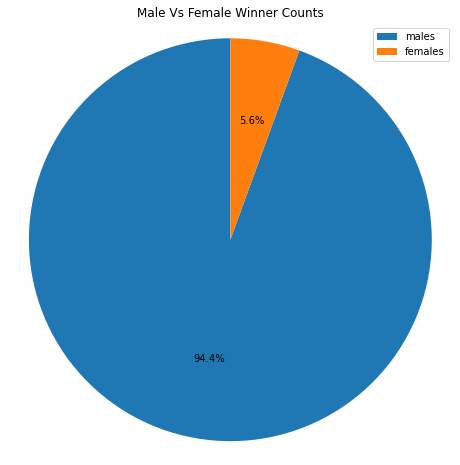

In [37]:
# Plotting the counts
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed

labels = ['males', 'females']
values = [((male_count / total) * 100), ((female_count / total) * 100)]

ax.pie(values, autopct='%1.1f%%', startangle=90)
ax.set_title("Male Vs Female Winner Counts")
ax.axis('equal')
plt.legend(labels)

plt.show()

Out of total noble prize winners 94.4% are men. There is huge disparity of prize distribution between men and women.

Lets Separate Nobel Prize winners who are alive.

In [38]:
alive = nobel[nobel['date_of_death'] != "0000-00-00"]

# Create dummies for 'category'
category_dummies = pd.get_dummies(alive['category'])

# Create dummies for 'gender'
gender_dummies = pd.get_dummies(alive['gender'])

# Print the dummies DataFrames
# print(category_dummies.head())
gender_dummies.head()

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [39]:
# Nobel Prize winners who are alive
alive2 = pd.concat([alive,category_dummies,gender_dummies],axis=1)
alive2.head(3)

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,gender,year,category,motivation,chemistry,economics,literature,medicine,peace,physics,female,male
0,Elinor,Ostrom,1933-08-07,2012-06-12,USA,US,female,2009.0,economics,"""for her analysis of economic governance, espe...",0,1,0,0,0,0,1,0
1,Wangari Muta,Maathai,1940-04-01,2011-09-25,Kenya,KE,female,2004.0,peace,"""for her contribution to sustainable developme...",0,0,0,0,1,0,1,0
2,Dorothy Crowfoot,Hodgkin,1910-05-12,1994-07-29,Egypt,EG,female,1964.0,chemistry,"""for her determinations by X-ray techniques of...",1,0,0,0,0,0,1,0


#### Plotting top five countries that are dominating across different categories

Lets Plot few graphs to find out top five countries that are dominating across different categories.

#### Category: Medicine

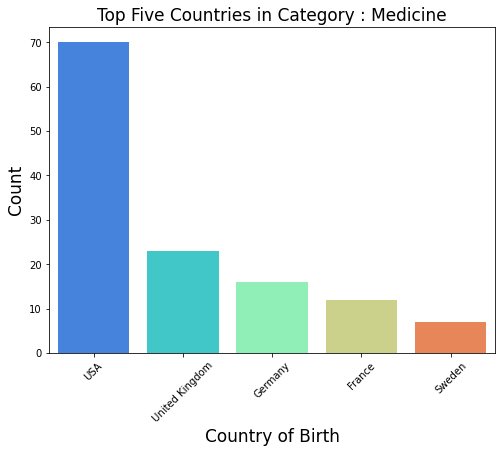

In [40]:
CountryVsCat = alive2.groupby('Country_of_birth')['medicine'].sum()
Top_5_countries_medicine = CountryVsCat.sort_values(ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(x=Top_5_countries_medicine.index,y=Top_5_countries_medicine.values,palette = "rainbow")
plt.title("Top Five Countries in Category : Medicine", fontsize = 17)
plt.ylabel("Count", fontsize = 17)
plt.xlabel('Country of Birth', fontsize=17)
plt.xticks(rotation = 45)
plt.show()
# Top_5_countries_medicine

Nobel Prize Winners in category : medicine, we can see USA is leading with huge numbers as compared with to other countries. 

#### Category : Peace

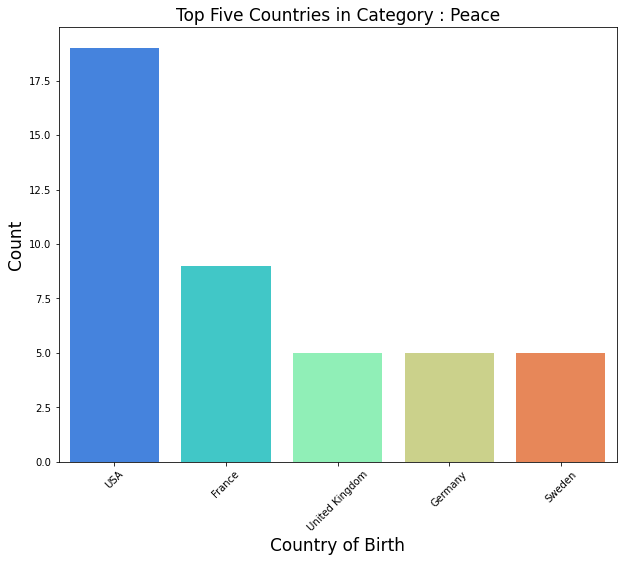

In [41]:
CountryVsCat2 = alive2.groupby('Country_of_birth')['peace'].sum() # category : peace
Top_5_countries_peace = CountryVsCat2.sort_values(ascending=False).head(5)
plt.figure(figsize=(10,8))
sns.barplot(x=Top_5_countries_peace.index, y = Top_5_countries_peace.values, palette='rainbow')
plt.title("Top Five Countries in Category : Peace", fontsize = 17)
plt.ylabel('Count', fontsize=17)
plt.xlabel('Country of Birth', fontsize=17)
plt.xticks(rotation = 45)
plt.show()

If we look at trends its quite evident that USA is leading in each category and won most number of nobel prize as compared to other countries.

We will see below which country is dominating with most wins overall.

In [42]:
nobel['Country_of_birth'].value_counts(ascending=False).head()

USA               257
United Kingdom     83
Germany            61
France             51
Sweden             29
Name: Country_of_birth, dtype: int64

As we can see from above analysis USA is leading with 257 wins. 

#### Plotting distribution of prize winners by country of birth.

lets plot the distribution of prize winners with respect to country of birth to get a visual sense how the distribution of top ten countries looks like.

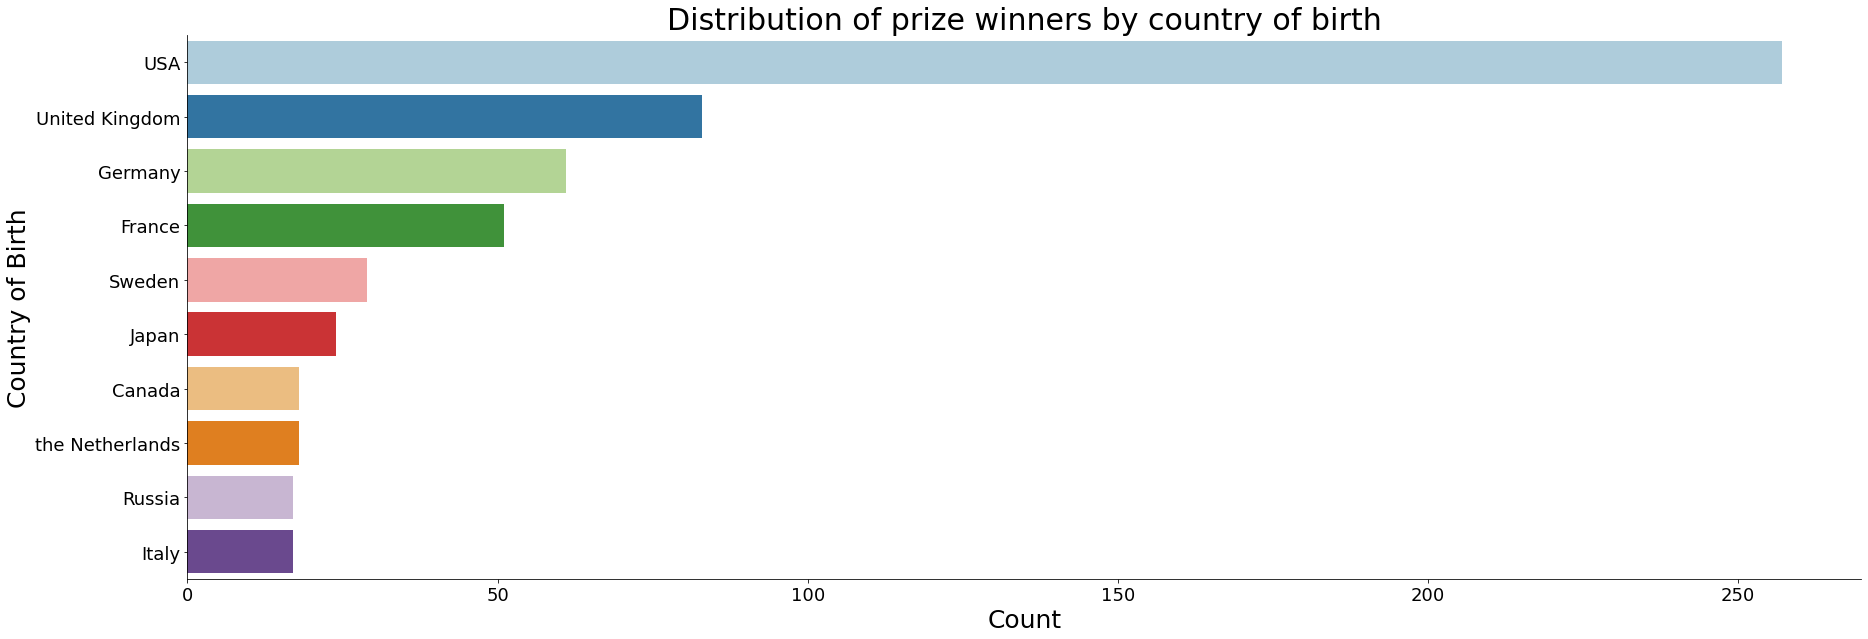

In [43]:
plt.figure(figsize= (30,10))
sns.countplot(y = "Country_of_birth", data = nobel,  order = nobel["Country_of_birth"].value_counts().head(10).index  , palette = "Paired")
plt.title("Distribution of prize winners by country of birth", fontsize = 30)
plt.xlabel("Count", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Country of Birth", fontsize=25)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

Again, we can see clearly USA is leading with huge numbers.

As we can see USA is leading massively with 257 nobel awards.
- Calculating the proportion of USA born winners per decade

In [44]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['Country_of_birth'] == 'USA'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017857
1,1910,0.078947
2,1920,0.074074
3,1930,0.254545
4,1940,0.325000
5,1950,0.285714
6,1960,0.280000
7,1970,0.320388
8,1980,0.333333
9,1990,0.415842


#### Plot to see when USA start dominating  
Will see when the USA started to dominate the Nobel charts we need a plot!

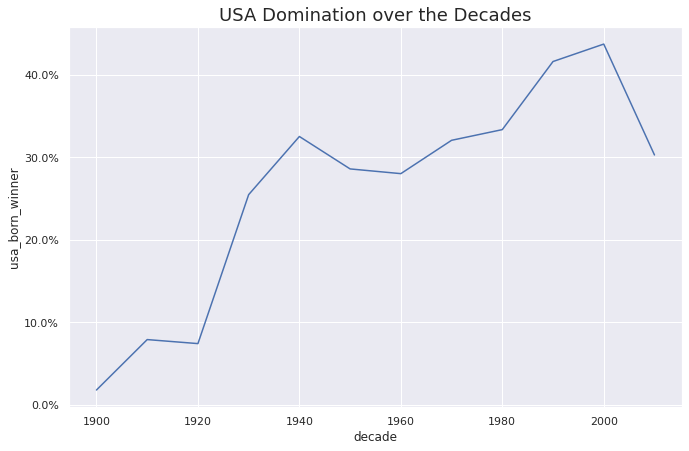

In [45]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]
# Plotting USA born winners
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
plt.title("USA Domination over the Decades", fontsize = 18)
# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

There is a surge of USA born winners from 1920 till 2000 i.e by 2000 almost 50% of prizers winners were from USA. From 2000 onwards we can see there is a decline in USA winners.

#### Plotting the graph, for Female Winners over the decades

As women comprise hardly of 5% of nobel prize winners, it would be interesting to see in which field women excelled the most?

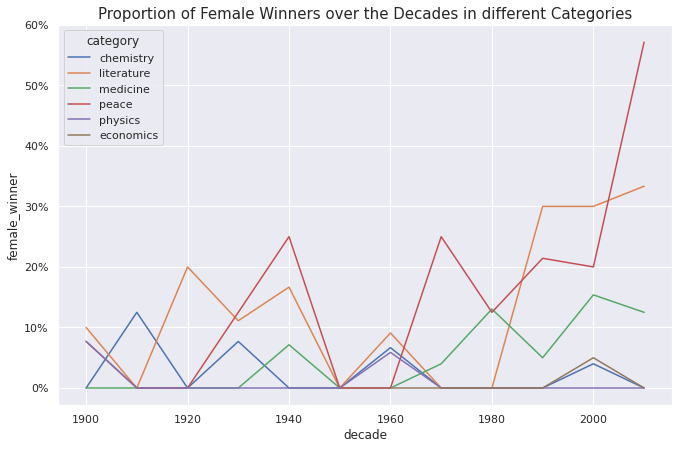

In [46]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['gender'] == 'female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Proportion of Female Winners over the Decades in different Categories", fontsize = 15)
plt.show()

The plot above is a bit messy as the lines are overplotting.But it shows interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance which exhibit the most significant disparities. Conversely, there is a moderately favorable trend in medicine, and the literature prize has become more equitably distributed since the 1990s. An interesting outlier is the peace prize during the 2010s, though it's important to note that this only spans the years 2010 to 2016.

## Asking and Answering Questions

### Q1:What is the average age at which Nobel Prize winners receive the award?

In [49]:
nobel['age_at_award'] = nobel['year'] - nobel['date_of_birth'].dt.year

# Calculate average age at award
average_age_at_award = nobel['age_at_award'].mean()

print("The average age at which Nobel Prize Winners receive the award was",average_age_at_award)

The average age at which Nobel Prize Winners receive the award was 59.32027649769585




Lets plot this to get clear visual representations of the distribution of Nobel Prize Winners ages.

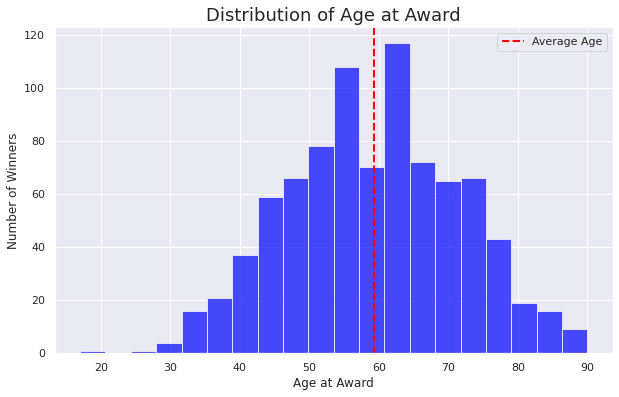

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(nobel['age_at_award'], bins=20, color='blue', alpha=0.7)
plt.axvline(average_age_at_award, color='red', linestyle='dashed', linewidth=2, label='Average Age')
plt.xlabel('Age at Award')
plt.ylabel('Number of Winners')
plt.title('Distribution of Age at Award', fontsize = 18)
plt.legend()
plt.show()

The graph is normally distributed means the majority of Nobel Prize Winners fall in the range of 50 to 70 years.

### Q2: How old were they when they get the prize?

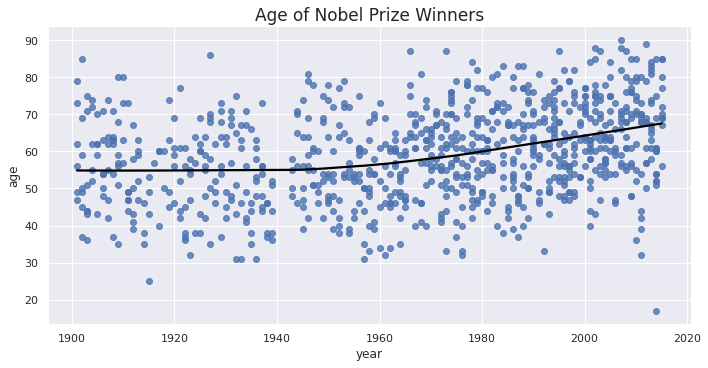

In [51]:

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['date_of_birth'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})
plt.title("Age of Nobel Prize Winners", fontsize = 17)
plt.show()

The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

### Q3: What was the age differences between prize categories

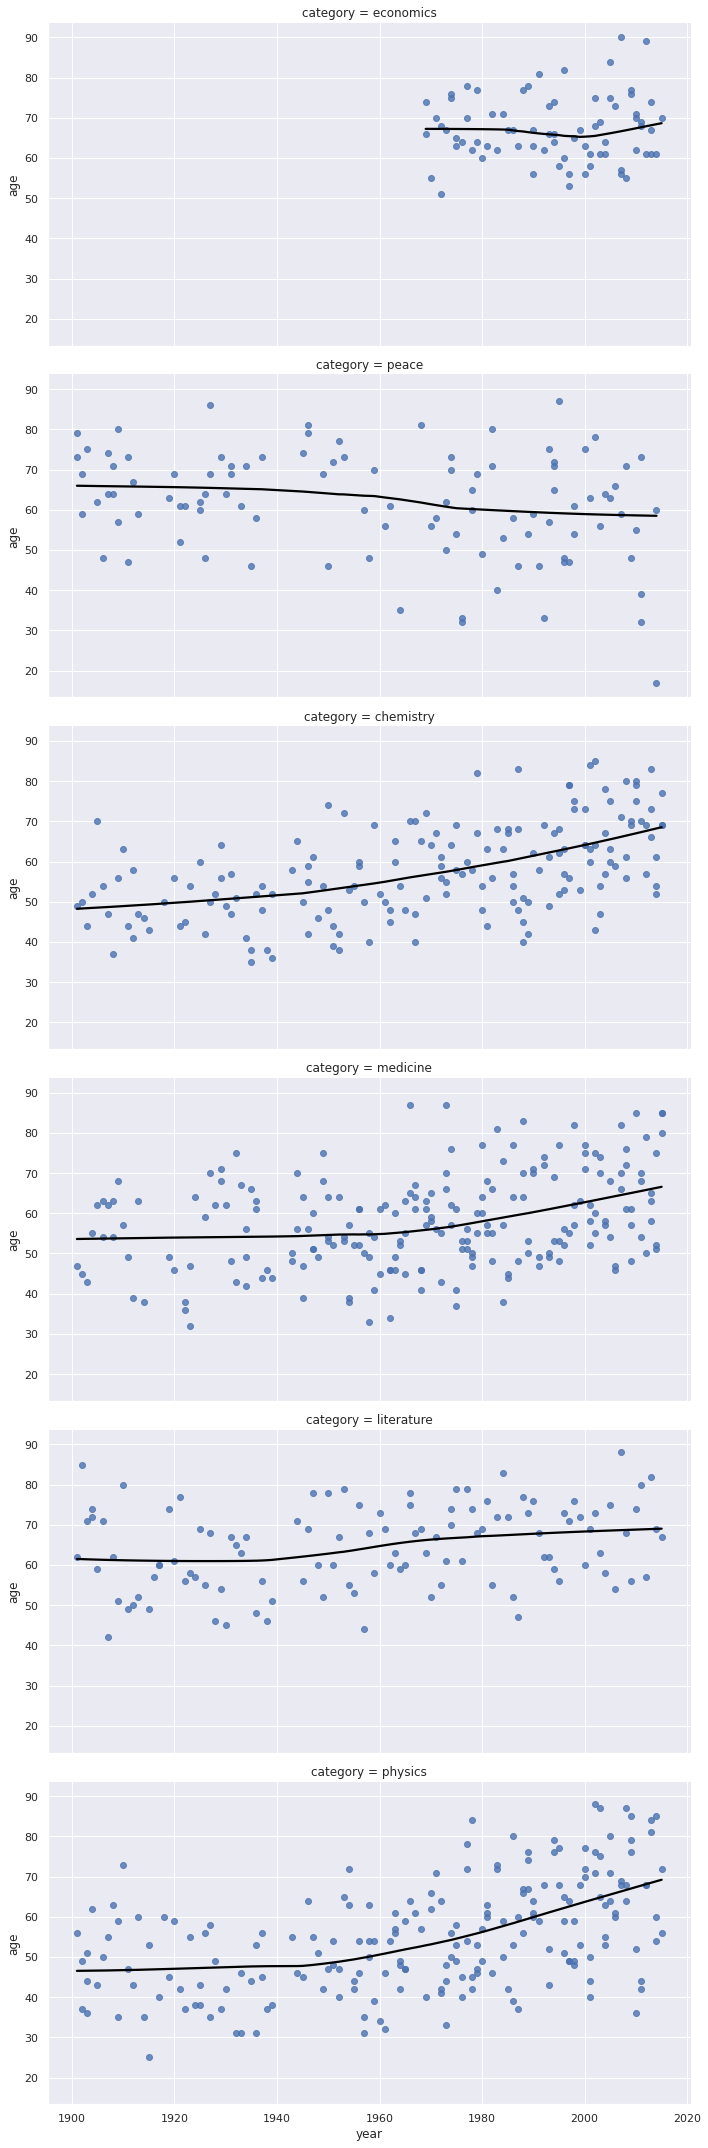

In [52]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})
plt.show()

More plots with lots of exciting stuff going on! We see that winners of the chemistry, medicine, and physics prize have gotten older over time. For physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!



In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

### Who was the youngest and oldest to win Nobel Prize?

In [53]:
# Find the youngest and oldest Nobel Prize winners by country
youngest_winner = nobel.loc[nobel['age_at_award'].idxmin()]
oldest_winner = nobel.loc[nobel['age_at_award'].idxmax()]
print("Youngest Nobel Prize winner:")
print("Name:", youngest_winner['firstname'], youngest_winner['surname'])
print("Country:", youngest_winner['Country_of_birth'])
print("Age:", youngest_winner['age'])

print("\nOldest Nobel Prize winner:")
print("Name:", oldest_winner['firstname'], oldest_winner['surname'])
print("Country:", oldest_winner['Country_of_birth'])
print("Age:", oldest_winner['age'])

Youngest Nobel Prize winner:
Name: Malala Yousafzai
Country: Pakistan
Age: 17.0

Oldest Nobel Prize winner:
Name: Leonid Hurwicz
Country: Russia
Age: 90.0


The oldest to get a nobel prize was Leonid Hurwicz while the youngest winner for her struggle against the suppression of children and young people and for the right of all children to education was Malala Yousafzai.

### Q: 4 What was the gender distribution of prizes by year and also plot the distribution of last 10 years???

In [54]:
# Calculate the gender distribution by year
gender_distribution_by_year = nobel.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Calculate the total number of winners per year
gender_distribution_by_year['Total'] = gender_distribution_by_year['female'] + gender_distribution_by_year['male']
gender_distribution_by_year.tail(4)

gender,female,male,Total
year,,,
2013.0,1,11,12
2014.0,2,11,13
2015.0,2,8,10
2016.0,0,8,8


<Figure size 864x576 with 0 Axes>

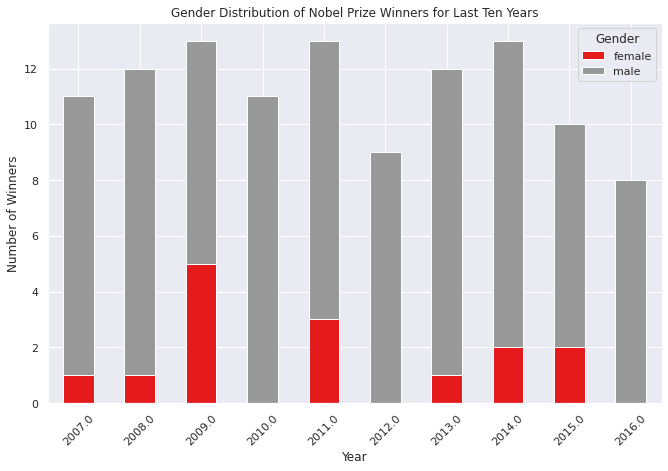

In [55]:
# Find the last ten years by sorting the years in descending order and selecting the last ten
last_ten_years = gender_distribution_by_year.index[-10:]
gender_distribution_last_ten = gender_distribution_by_year.loc[last_ten_years]

# Create a stacked bar plot to visualize gender distribution for the last ten years
plt.figure(figsize=(12, 8))
gender_distribution_last_ten.drop(columns='Total').plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('Year')
plt.ylabel('Number of Winners')
plt.title('Gender Distribution of Nobel Prize Winners for Last Ten Years')
plt.legend(title='Gender')
plt.xticks(rotation = 45)
plt.show()

As we can see majority of winners of last ten years are men except for 2009 where proportion of female winners is quite good as compared to other years. 

## Inferences and Conclusion:
The main aim of the project was to analyze the Nobel Prize Winners over the years and take insights from trends related to global peace, diplomacy, science and humanitarian efforts.
Some important points of analysis are:

- Researchers and policymakers can gain insights into complex and evolving landscape of global peace, the challenges that persist.

- The analysis reveals a consistent gender disparity across all categories, emphasizing the need for thorough examination of women's representation among Peace Prize laureates.

- USA's consistent leadership in 20th-century Nobel Prize winners reflects its pivotal global role driven by geopolitical influence, economic prowess and environmental initiatives.

## References and Future Work
## References
Dataset is obtained from kaggle:
- https://www.kaggle.com/datasets/thedevastator/a-complete-history-of-nobel-prize-winners/code

for code related doubts I followed:
- https://stackoverflow.com/
- https://www.w3schools.com/

for Numpy, Pandas, Matplotlib and Seaborn user guide and tutorial:
-  https://numpy.org/doc/stable/user/
-  https://pandas.pydata.org/docs/user_guide/index.html
-  https://matplotlib.org/3.3.1/users/index.html
-  https://seaborn.pydata.org/tutorial.html

## Future Work:
For future work a lot could be done depending upon objective of our analysis.  We can deploy different Machine Learning models according to our objective, some of which are:

 - Classification Model for Nominee Prediction:
We can build a classification model that predicts whether a researcher or group of researchers will be nominated for a Nobel Prize using features such as their research contributions, affiliations, citations, and publication records.


 - Time Series Analysis for Trend Prediction:
 Develop a time series analysis model to predict trends in Nobel Prize winners' fields over time. This could involve forecasting techniques to predict which scientific fields might be more likely to produce future winners.
 
 
 - Can also plot more pretty and appealing seaborn graphs. 
